In [118]:
import csv
import locale
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd

from ast import literal_eval

In [119]:
def fill_gaps_in_timeline(timeline):
    """For a timeline in years, fills in gaps where there are no values with the value 0.
    :param timeline - an ordered dict with the years as keys and the counts as values
    :returns an ordered dict with complete data between the first and final year"""
    start_year = int(list(timeline.keys())[0])
    end_year = int(list(timeline.keys())[-1]) + 1
    
    complete_timeline = OrderedDict()
    for year in range(start_year, end_year):
        if str(year) not in timeline:
            complete_timeline[str(year)] = 0
        else:
            complete_timeline[str(year)] = int(timeline[str(year)])
    return complete_timeline

In [120]:
def format_overlay_hover_info(keys, values, name):
    """Creates a list of hover infos for this part of the overlay graph. Hover information has format
    '(key, value) name'
    :param keys - the keys for the points on the graph
    :param values - the values of the points on the graph
    :param name - the name of the data
    :returns the text for the hover info
    """
    locale.setlocale(locale.LC_ALL, '')
    text = []
    i = 0
    for key in keys:
        format_string = "%%.%df"%0
        formatted_value = locale.format_string(format_string, values[i], grouping = True)
        text.append(f"{str(key)}, ({formatted_value}) {name}")
        i += 1
    return text

In [121]:
def get_separators():
    """Gets the local number separators
    :returns the decimal point and thousands separators"""
    decimal_point = locale.localeconv()['decimal_point']
    thousands_sep = locale.localeconv()['thousands_sep']
    return decimal_point + thousands_sep

In [122]:
def plot_Y_against_X_as_bar_chart(x_values, y_values, chart_title, x_axis_label, y_axis_label, vertical_labels):
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(111)
    bar_colors = ['tab:blue']
    
    ax.bar(x_values, y_values, color=bar_colors)
    ax.set_xlabel(x_axis_label)   
    ax.set_ylabel(y_axis_label)
    ax.set_title(chart_title)
    plt.xticks(range(len(x_values)), x_values, rotation='vertical' if vertical_labels else 'horizontal')
    
    plt.show()

In [123]:
def replace_unique(x):
    return list(set(x))

In [124]:
programmes_dataframe = pd.read_csv("joop.csv", sep='|', parse_dates=['Uitzenddatum'], 
                                   dtype={"lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)": 'Int32'},
                                   converters={"Zendgemachtigde": literal_eval,
                                               "All years": literal_eval,
                                               "Persons behind camera": literal_eval,
                                               "Persons in front of camera": literal_eval
                                              })
print(f"{len(programmes_dataframe)} programmes in total\n")
print(programmes_dataframe)

17211 programmes in total

       Unnamed: 0  Jaartal (start) jaartallen (start-eind)  \
0             NaN             1970               1970-1971   
1             NaN             1972               1972-1974   
2             NaN             1972               1972-1974   
3             NaN             1972               1972-1974   
4             NaN             1972               1972-1974   
...           ...              ...                     ...   
17206         NaN             2010                     NaN   
17207         NaN             2010                     NaN   
17208         NaN             2013                     NaN   
17209         NaN             2013                     NaN   
17210         NaN             2013                     NaN   

                                      Vragen/opmerkingen  \
0      Via André? 'n Lach in de Ruimte is een Nederla...   
1                                                    NaN   
2                                               

/tmp/ipykernel_14483/3944884160.py:1: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



## Unique titles

In [125]:
print(programmes_dataframe["lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)"])

0         70
1         47
2         50
3         45
4         45
        ... 
17206     24
17207    128
17208     55
17209     55
17210     88
Name: lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld), Length: 17211, dtype: Int32


In [126]:
print(f"{len(programmes_dataframe['Titel'].unique())} unique programme titles\n")
title_counts = programmes_dataframe["Titel"].value_counts()
print(title_counts)

326 unique programme titles

Titel
Goede tijden, slechte tijden        7031
Onderweg naar morgen                2490
Rad van Fortuin                     1681
Goudkust                             925
ONM (= Onderweg naar morgen)         725
                                    ... 
Bouw mee aan Carré                     1
De leukste momenten uit Jaap Aap       1
Het Nationale Bevrijdingsfeest         1
DE GOUDEN TELEVIZIERRING 1992          1
De Van Duin Show                       1
Name: count, Length: 326, dtype: int64


## Total number of hours

In [127]:
length_in_minutes = programmes_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].sum()
print(f"Total number of hours {length_in_minutes/60}")

print(f"\nLength known for {programmes_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].count()} of the {len(programmes_dataframe)} programmes")

Total number of hours 8512.083333333334

Length known for 17138 of the 17211 programmes


### Total number of hours - public broadcasters

In [128]:
public_dataframe = programmes_dataframe[programmes_dataframe['Commerciele of publieke omroep?'] == "publiek"]
length_in_minutes = public_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].sum()
print(f"Total number of hours {length_in_minutes/60}")

print(f"\nLength known for {public_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].count()} of the {len(public_dataframe)} programmes")

Total number of hours 1090.1166666666666

Length known for 1672 of the 1676 programmes


### Total number of hours - commercial broadcasters

In [129]:
commercial_dataframe = programmes_dataframe[programmes_dataframe['Commerciele of publieke omroep?'] == "commercieel"]
length_in_minutes = commercial_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].sum()
print(f"Total number of hours {length_in_minutes/60}")

print(f"\nLength known for {commercial_dataframe['lengte programma in minuten (indien niet bij ons aanwezig aanwezig lengte bij benadering handmatig vermeld)'].count()} of the {len(commercial_dataframe)} programmes")


Total number of hours 7407.266666666666

Length known for 15455 of the 15521 programmes


### Distribution public/commercial/unknown

In [130]:
public_commercial_counts = programmes_dataframe['Commerciele of publieke omroep?'].value_counts()
print(public_commercial_counts)

print(f"\nPublic/commercial known for {programmes_dataframe['Commerciele of publieke omroep?'].count()} of the {len(programmes_dataframe)} programmes")

Commerciele of publieke omroep?
commercieel    15521
publiek         1676
Name: count, dtype: int64

Public/commercial known for 17197 of the 17211 programmes


## Digital content in own collection

digitaal ja/nee
ja     1621
nee     204
Name: count, dtype: int64

Digital known for 1825 of the 1825 programmes


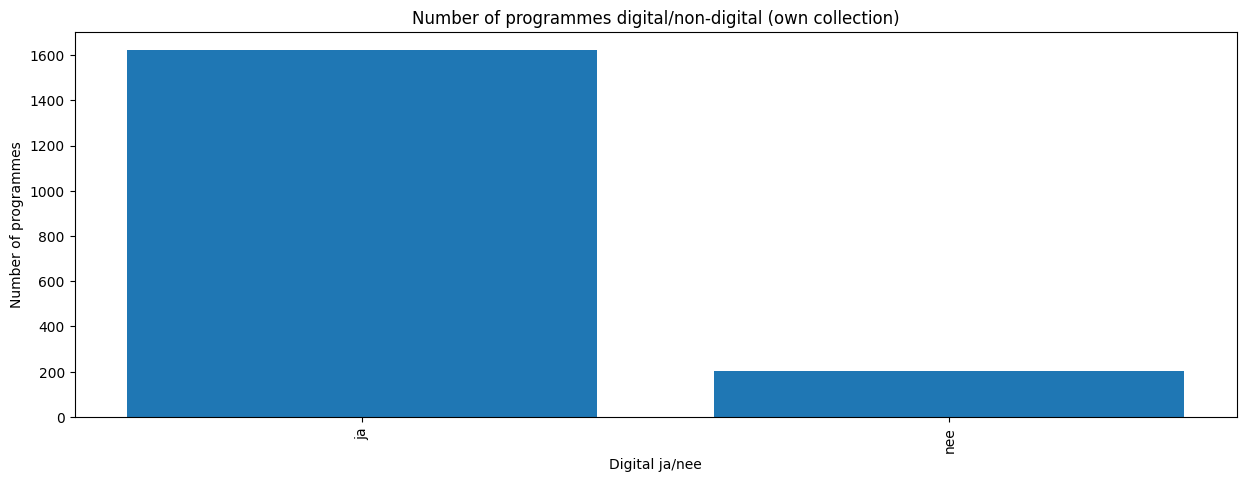

In [157]:
in_own_collection_dataframe = programmes_dataframe[programmes_dataframe['in archief BenG ja/nee'] == "ja"]
digital_type_counts = in_own_collection_dataframe["digitaal ja/nee"].value_counts()
print(digital_type_counts)

print(f"\nDigital known for {in_own_collection_dataframe['digitaal ja/nee'].count()} of the {len(in_own_collection_dataframe)} programmes")
plot_Y_against_X_as_bar_chart(list(digital_type_counts.index),
                            list(digital_type_counts), 
                            "Number of programmes digital/non-digital (own collection)", 
                            "Digital ja/nee",
                            "Number of programmes", 
                            True)

## Distribution over time

#### Number of programmes

[1, 19, 16, 9, 22, 10, 107, 13, 15, 22, 19, 55, 15, 322, 125, 75, 46, 94, 9086, 433, 291, 485, 3406, 165, 1095, 168, 229, 356, 171, 42, 249, 6, 17, 1, 6, 11, 4, 2, 3]
39
[1970, 1972, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2010, 2013]


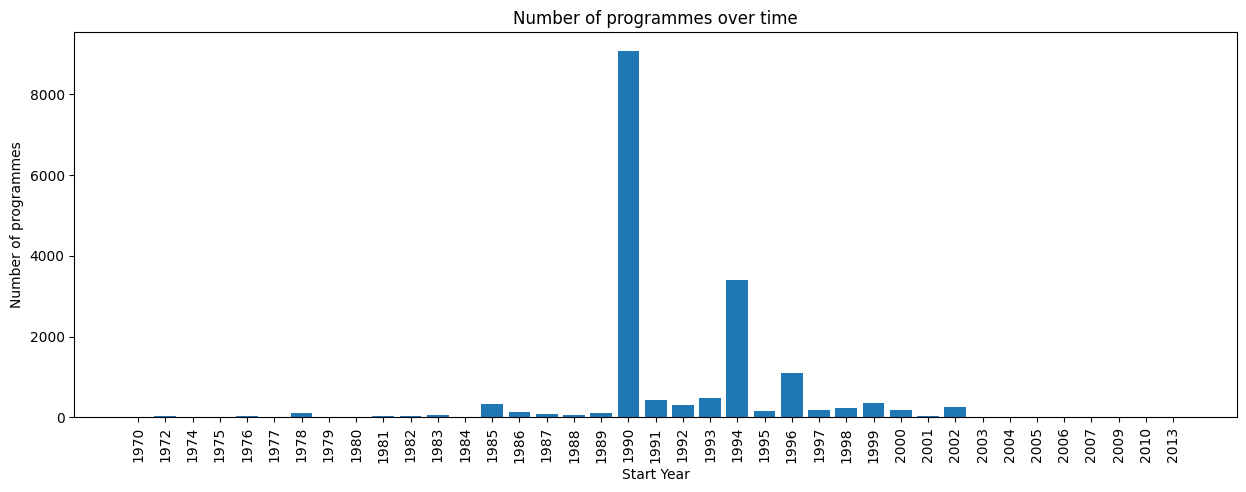

In [152]:
date_counts = programmes_dataframe["Jaartal (start)"].value_counts().sort_index()
print(list(date_counts))
print(len(list(date_counts.index)))
print(list(date_counts.index))
plot_Y_against_X_as_bar_chart([str(i) for i in list(date_counts.index)],
                            list(date_counts), 
                            "Number of programmes over time", 
                            "Start Year",
                            "Number of programmes", 
                            True)

#### Number of unique titles

All years
1970     1
1971     1
1972     3
1973     3
1974     4
1975     5
1976     9
1977     9
1978    18
1979    25
1980    25
1981    22
1982    23
1983    25
1984    24
1985    26
1986    27
1987    30
1988    32
1989    22
1990    29
1991    29
1992    34
1993    41
1994    45
1995    55
1996    45
1997    39
1998    42
1999    48
2000    43
2001    32
2002    24
2003    25
2004    19
2005    15
2006    13
2007     8
2008     3
2009     6
2010     5
2011     1
2012     1
2013     2
2014     1
2015     1
2016     1
2017     1
2018     1
2019     1
2020     1
2021     1
2022     1
2023     1
Name: count, dtype: int64


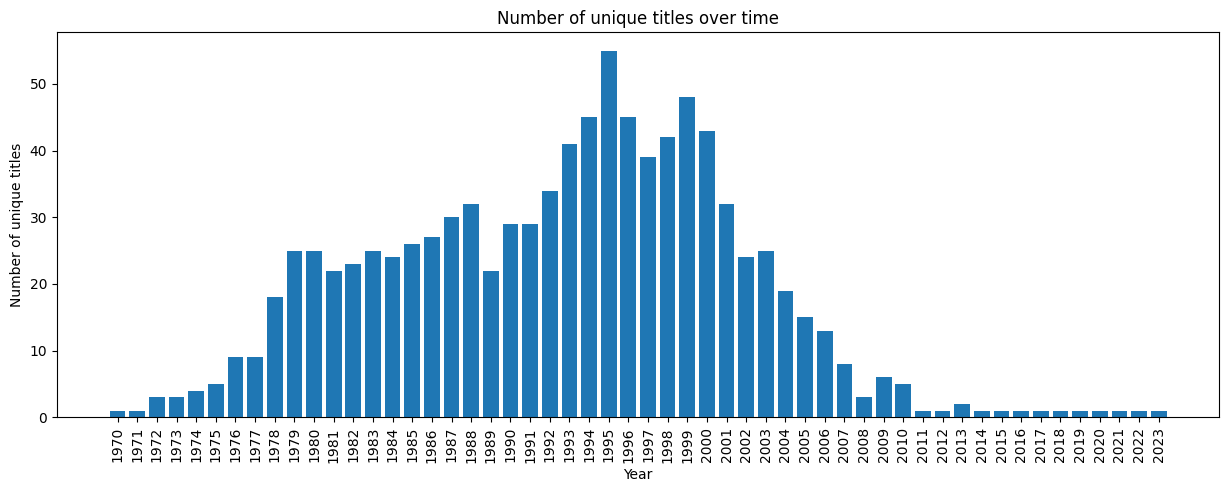

In [153]:
# create a dataframe with the unique titles and all years
unique_titles_years_dataframe = programmes_dataframe.groupby('Titel').agg({'All years': 'first'})

date_counts = unique_titles_years_dataframe["All years"].explode().value_counts().sort_index()
print(date_counts)
plot_Y_against_X_as_bar_chart([str(i) for i in list(date_counts.index)],
                            list(date_counts), 
                            "Number of unique titles over time", 
                            "Year",
                            "Number of unique titles", 
                            True )

In [134]:
# unique titles in a given year
year = 1995
mask = programmes_dataframe["All years"].apply(lambda x: str(year) in str(x))
programmes_in_year = programmes_dataframe[mask]
unique_titles_in_year = set(list(programmes_in_year["Titel"]))
print(f"There were {len(unique_titles_in_year)} unique titles in {year}")
for unique_title in unique_titles_in_year:
    print(unique_title)


There were 56 unique titles in 1995
SamSam
De Winkel van Sinkel (1995-2000; 2003)
Travel Planner (1995)
Zonder Ernst
Kink in de kabel (klucht)
Sterrenplaybackshow
Wie ben ik?
WNF Andre & Loretta Show
De Wekdienst (1995-1996)
Recordshow
Lekker lang Lusse
Dossier Verhulst
Call Girls
Toppers
Cracks of Kruks (1995-1998)
Wedden dat…?
Hoe zit dat?
U beslist!
Het zonnetje in huis
THE MAKING OF GALA OF THE STARS
Liefdesnest (1995-1999)
Vrouwenvleugel
PaNiek (1995-1996)
I.S.C.H.A. 
De Droogkap (1995-1998)
Nachtbrakers (1995-1996)
POSTCODE JACKPOT
DE GELD MAAKT GELUKKIG SHOW
Moppentoppers
Goede tijden, slechte tijden
Liefde op het eerste gezicht
Heartbreak Hotel
STUDIO 2000
Mini Playbackshow
Now or Never
Onderweg naar morgen
Rad van Fortuin
Love Is on the Air (1995)
Vrienden voor het leven
GALA OF THE STARS
De Van Duin Show compilaties
Victor/Victoria
Showtime
Bij Van Duin
20 Plus
Klachten TV (1995-1996)
The Lounge (1995-1996, 1998)
ZONDAGSKINDEREN
Bureau Kruislaan
ONM (= Onderweg naar morgen)
S

## Oldest/newest programmes

In [135]:
oldest_year = int(programmes_dataframe["Jaartal (start)"].min())
newest_year = int(programmes_dataframe["Jaartal (start)"].max())

# now get the min of the dates within the oldest year
oldest_dates = programmes_dataframe[programmes_dataframe["Jaartal (start)"] == oldest_year]

if len(oldest_dates) == 1:
    # just use date of programme
    print(f"Oldest programme: {oldest_year if pd.isna(oldest_dates.iloc[0]['Uitzenddatum']) else oldest_dates.iloc[0]['Uitzenddatum']}")
else:
    print(f"Oldest programme: {oldest_dates['Uitzenddatum'].min()}")
    
# now get the max of the dates within the newest year
newest_dates = programmes_dataframe[programmes_dataframe["Jaartal (start)"] == newest_year]

if len(newest_dates) == 1:
    # just use date of programme
    print(f"Newest programme: {newest_year if pd.isna(newest_dates.iloc[0]['Uitzenddatum']) else newest_dates.iloc[0]['Uitzenddatum']}")
else:
    print(f"Newest programme: {newest_dates['Uitzenddatum'].max()}")

Oldest programme: 1970
Newest programme: 26-12-2015


## Longest running programmes

                                      Titel  Length of run
220                    Onderweg naar morgen             77
139            Goede tijden, slechte tijden             33
183                     Laat ze maar lachen             21
208                       Mini Playbackshow             17
44   Bassie en Adriaan en de verzonken stad             16
..                                      ...            ...
153                        Het gulden schot              0
155                             Hij & Julia              0
156                                Hitbingo              0
157             Hoe verlies ik een miljoen?              0
325           special cd Recht uit het hart              0

[326 rows x 2 columns]


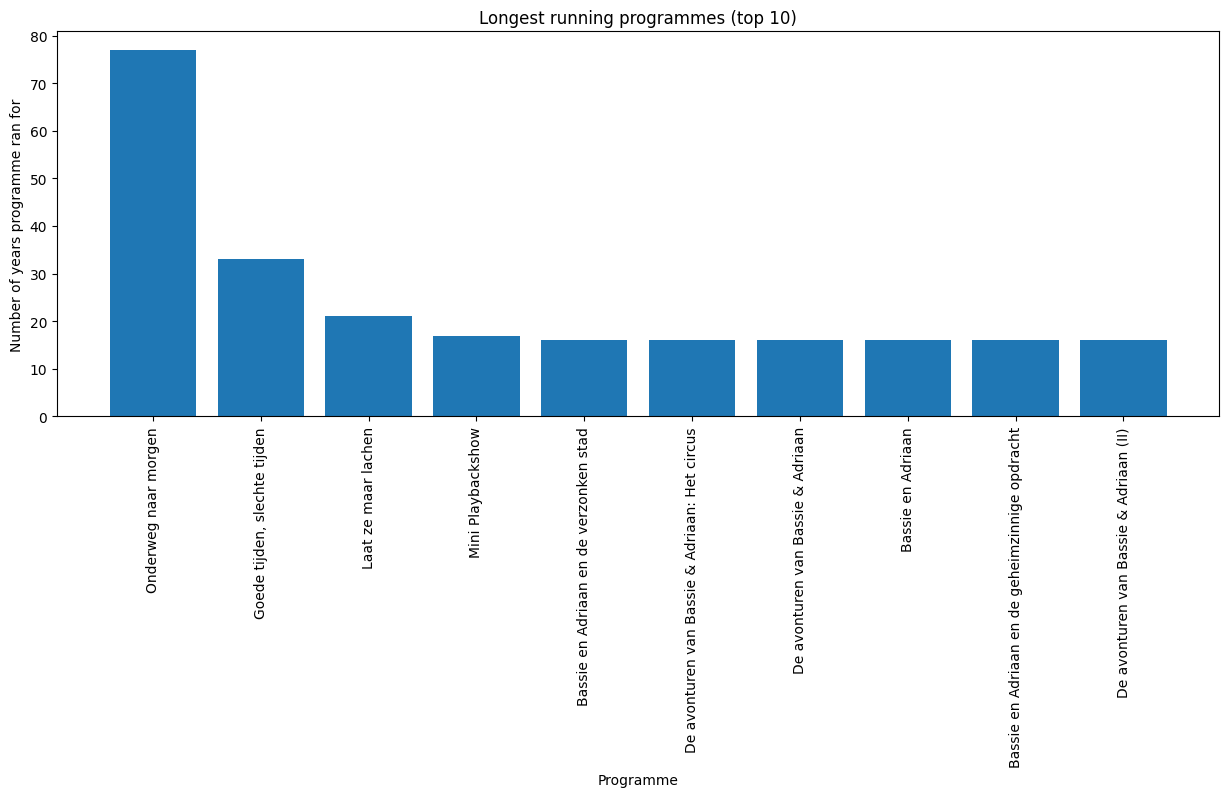

In [136]:
programmes_dataframe["Length of run"] = programmes_dataframe.fillna(0)["Last year"].astype(int) - programmes_dataframe["First year"].fillna(0).astype(int)

run_length_dataframe = programmes_dataframe[['Titel', 'Length of run']].copy()

# take the maximum length of run for each programme
run_length_dataframe = run_length_dataframe.groupby(['Titel']).max().reset_index()
longest_running_programmes = run_length_dataframe.sort_values(by=['Length of run'], ascending=False)
print(longest_running_programmes)
number_to_show = 10
plot_Y_against_X_as_bar_chart(list(longest_running_programmes['Titel'])[:number_to_show],
                            list(longest_running_programmes['Length of run'])[:number_to_show], 
                            f"Longest running programmes (top {number_to_show})", 
                            "Programme",
                            "Number of years programme ran for", 
                            True)


## Distribution over broadcaster

### Number of programmes per broadcaster

Zendgemachtigde
RTL4             11071
SBS6              1277
NET5               925
FOX8               925
BNN                725
Veronica           544
Yorin              417
TROS               320
KRO                237
RTL 4              228
RTL5               188
AVRO               120
NCRV               116
VARA               108
RTL4\n             103
RTL-Veronique       78
V8                  45
RTL Veronique       41
VOO                 40
SBS 6               16
FOX 8               15
hh op NET 5         13
RTL 5                9
YORIN                5
EO                   4
NOS                  4
TALPA                4
OMROEP MAX           2
Name: count, dtype: int64


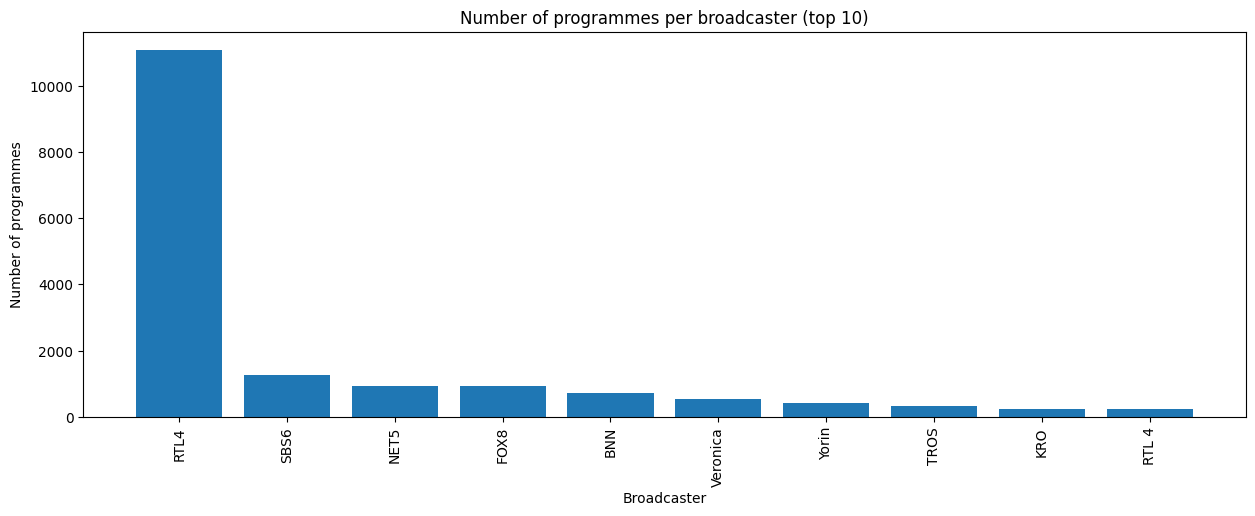

In [137]:
broadcaster_counts = programmes_dataframe['Zendgemachtigde'].explode().value_counts()
number_to_show = 10
print(broadcaster_counts)
plot_Y_against_X_as_bar_chart(list(broadcaster_counts.index)[:number_to_show],
                            list(broadcaster_counts)[:number_to_show], 
                            f"Number of programmes per broadcaster (top {number_to_show})", 
                            "Broadcaster",
                            "Number of programmes", 
                            True)

### Number of unique titles per broadcaster

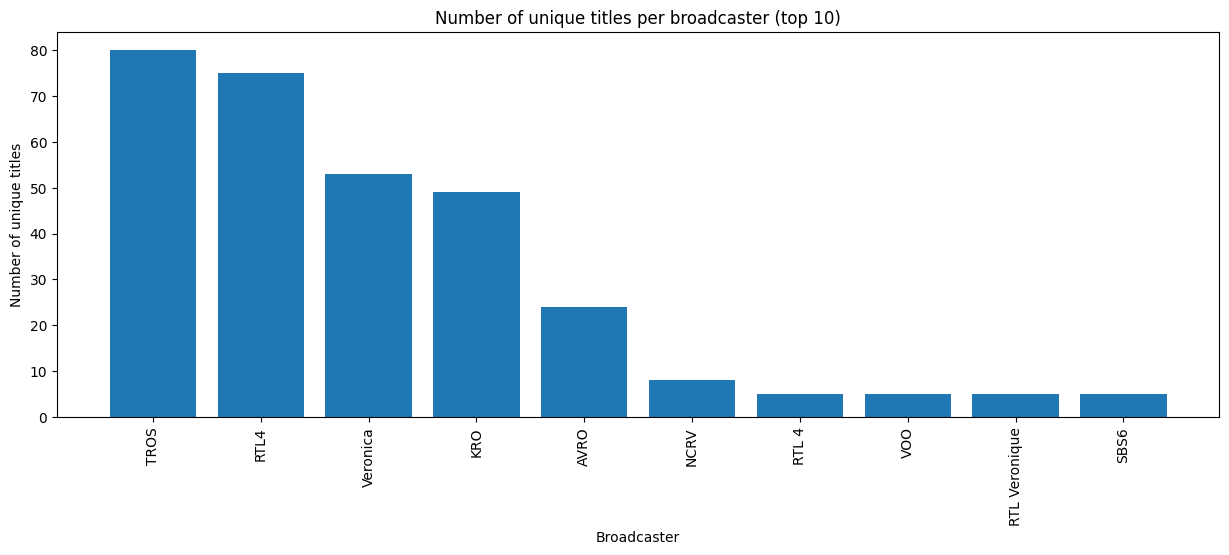

In [138]:
# create a dataframe with the unique titles and broadcasters
unique_titles_broadcasters_dataframe = programmes_dataframe.groupby('Titel').agg({'Zendgemachtigde': 'sum'})

# remove duplicates
unique_titles_broadcasters_dataframe= unique_titles_broadcasters_dataframe.applymap(replace_unique)
broadcaster_counts = unique_titles_broadcasters_dataframe['Zendgemachtigde'].explode().value_counts()
number_to_show = 10
plot_Y_against_X_as_bar_chart(list(broadcaster_counts.index)[:number_to_show],
                            list(broadcaster_counts)[:number_to_show], 
                            f"Number of unique titles per broadcaster (top {number_to_show})", 
                            "Broadcaster",
                            "Number of unique titles", 
                            True)

## Distribution commercial/public

### Number of programmes

Commerciele of publieke omroep?
commercieel    15521
publiek         1676
Name: count, dtype: int64


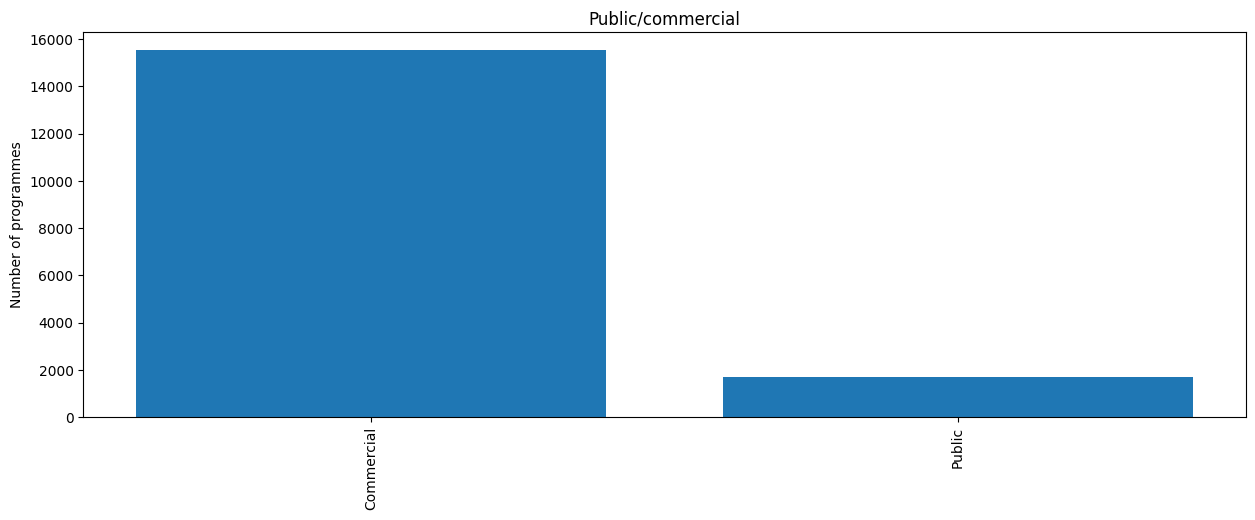

In [146]:
public_commercial_counts = programmes_dataframe["Commerciele of publieke omroep?"].value_counts()
print(public_commercial_counts)
plot_Y_against_X_as_bar_chart(["Commercial", "Public"], list(public_commercial_counts), "Public/commercial", "", "Number of programmes", True)

### Number of unique titles

Commerciele of publieke omroep?
publiek        173
commercieel    140
Name: count, dtype: int64


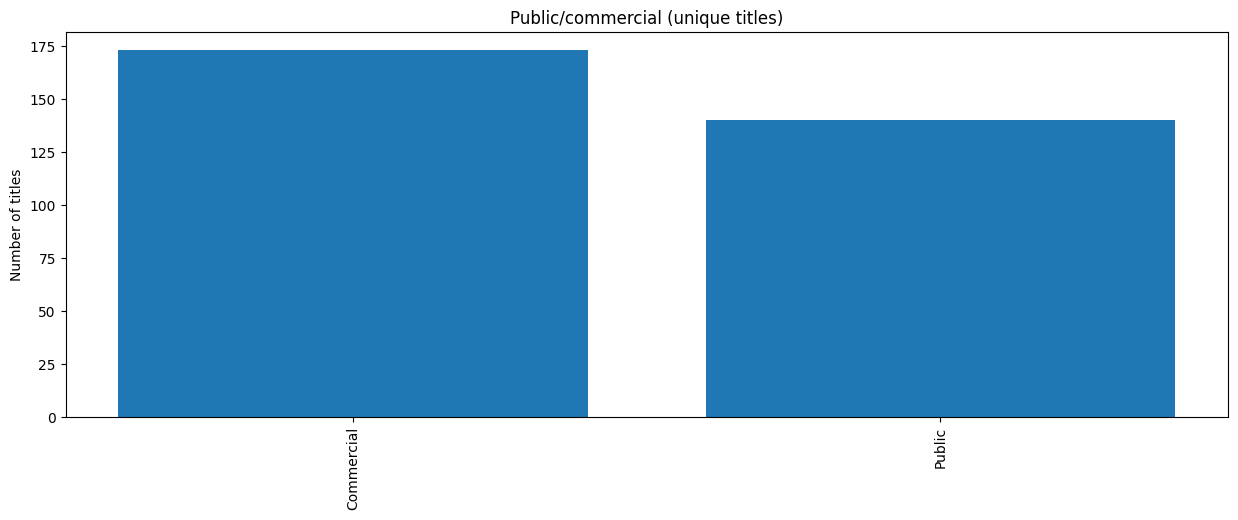

In [140]:
# create a dataframe with the unique titles and public/commercial
unique_titles_public_comm_dataframe = programmes_dataframe.groupby('Titel').agg({'Commerciele of publieke omroep?': 'first'})

public_commercial_counts = unique_titles_public_comm_dataframe["Commerciele of publieke omroep?"].value_counts()
print(public_commercial_counts)
plot_Y_against_X_as_bar_chart(["Commercial", "Public"], list(public_commercial_counts), "Public/commercial (unique titles)", "", "Number of titles", True)

## Appeared together with...
### Behind the scenes
Crew or Creator

#### Number of programmes

Persons behind camera
Guus (jr.) Verstraete    256
Hans van Eijck           256
Joop van den Ende        155
Ruud Bos                 128
Julie van Hemert         120
                        ... 
Coen Flink                 1
F.J. Goedhart              1
Stephan Fischer            1
Marjan Taconis             1
Paul Eenens                1
Name: count, Length: 763, dtype: int64


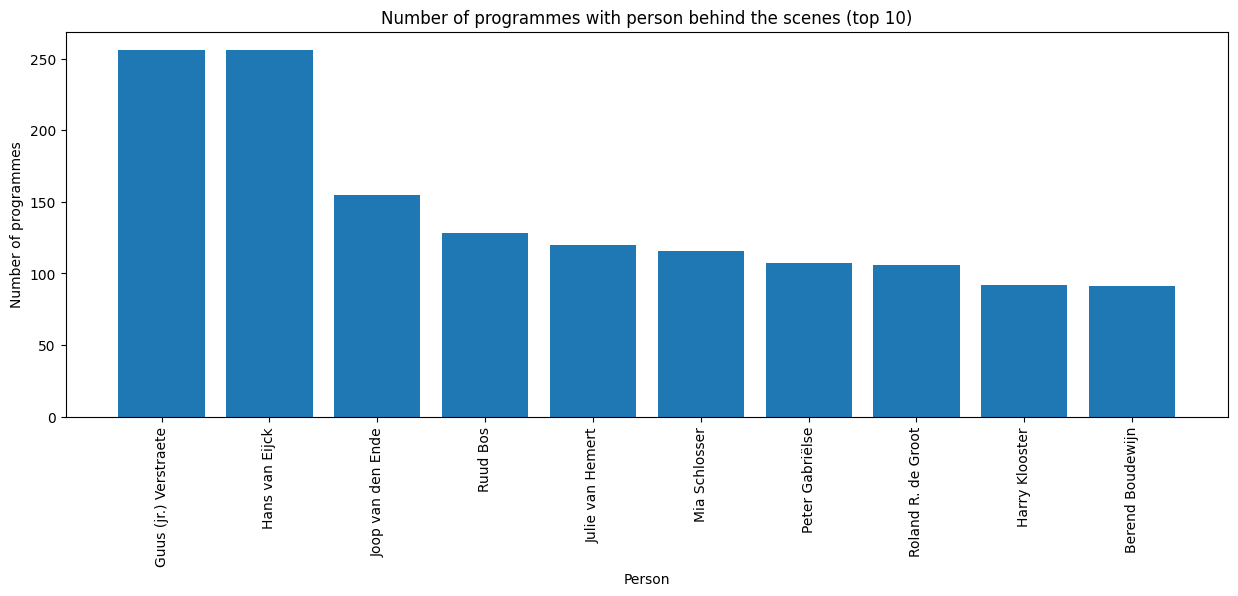

In [141]:
person_counts = programmes_dataframe['Persons behind camera'].explode().value_counts()
print(person_counts)
number_to_show = 10
plot_Y_against_X_as_bar_chart(list(person_counts.index)[:number_to_show],
                            list(person_counts)[:number_to_show], 
                            f"Number of programmes with person behind the scenes (top {number_to_show})",
                            "Person",
                            "Number of programmes", 
                            True)

#### Number of unique titles

Persons behind camera
Guus (jr.) Verstraete    59
Joop van den Ende        57
Ruud Bos                 28
René Sleeswijk           20
Robin de Levita          20
Hans van Eijck           20
Roland R. de Groot       19
Ruud Stienen             18
Sylvia Steinert          18
Marijke Schaaphok        17
Name: count, dtype: int64


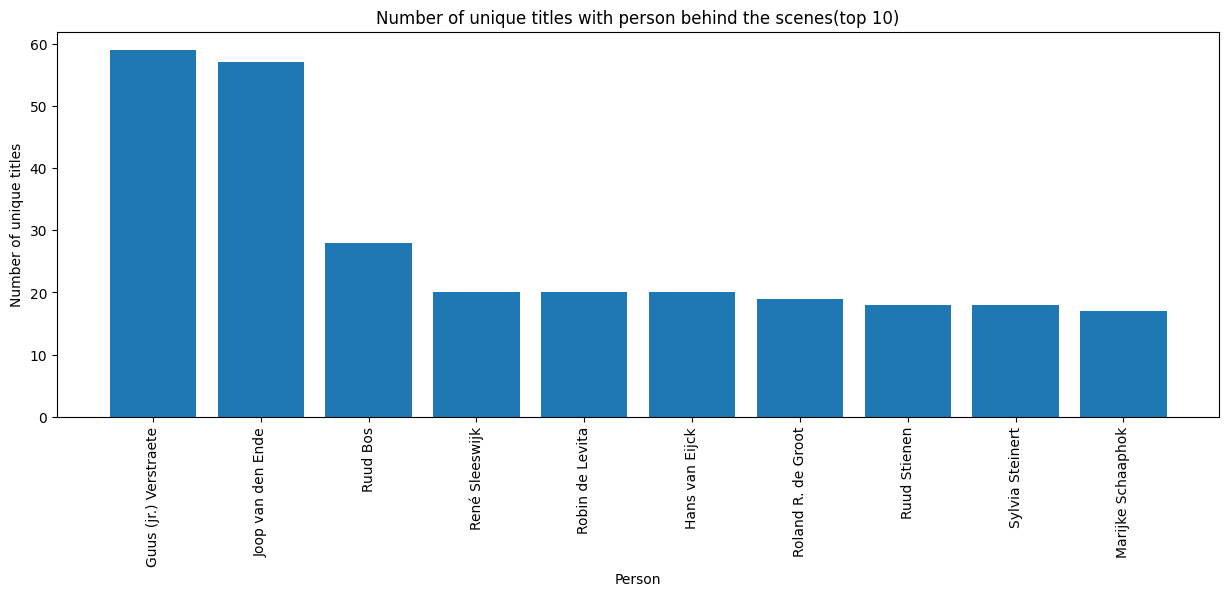

In [154]:
# create a dataframe with the unique titles and broadcasters
unique_titles_persons_dataframe = programmes_dataframe.groupby('Titel').agg({'Persons behind camera': 'sum'})

# remove duplicates
unique_titles_persons_dataframe= unique_titles_persons_dataframe.applymap(replace_unique)
person_counts = unique_titles_persons_dataframe['Persons behind camera'].explode().value_counts()
number_to_show = 10
print(person_counts[:number_to_show])
plot_Y_against_X_as_bar_chart(list(person_counts.index)[:number_to_show],
                            list(person_counts)[:number_to_show], 
                            f"Number of unique titles with person behind the scenes(top {number_to_show})",
                            "Person",
                            "Number of unique titles", 
                            True)

### Onscreen
Cast, Guest, mentioned person, recognised face or voice

#### Number of programmes

Persons in front of camera
André van Duin        124
Elisabeth Versluys     90
Ellen Vogel            87
Corrie van Gorp        85
Trudy Labij            83
                     ... 
Ernst Zwaan             1
Leo Straus              1
Cees Geel               1
Dan van Steen           1
André Breedland         1
Name: count, Length: 1958, dtype: int64


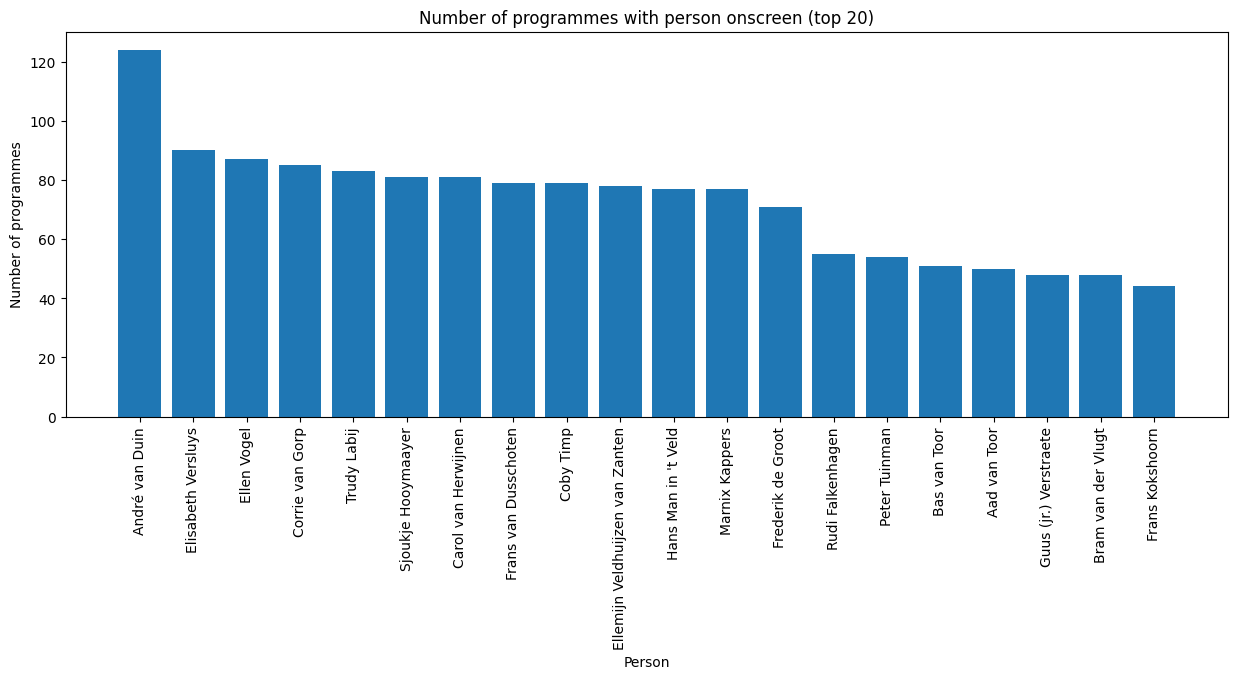

In [143]:
person_counts = programmes_dataframe['Persons in front of camera'].explode().value_counts()
print(person_counts)
number_to_show = 20
plot_Y_against_X_as_bar_chart(list(person_counts.index)[:number_to_show],
                            list(person_counts)[:number_to_show], 
                            f"Number of programmes with person onscreen (top {number_to_show})", 
                            "Person",
                            "Number of programmes", 
                            True)

#### Number of unique titles

In [158]:
# create a dataframe with the unique titles and broadcasters
unique_titles_persons_dataframe = programmes_dataframe.groupby('Titel').agg({'Persons in front of camera': 'sum'})

# remove duplicates
unique_titles_persons_dataframe= unique_titles_persons_dataframe.applymap(replace_unique)
person_counts = unique_titles_persons_dataframe['Persons in front of camera'].explode().value_counts()
number_to_show = 10
print(person_counts[:number_to_show])

Persons in front of camera
André van Duin           57
Frans van Dusschoten     31
Guus (jr.) Verstraete    30
Corrie van Gorp          29
Simone Kleinsma          22
Joop van den Ende        22
Sandra Reemer            21
Henny Huisman            21
Willeke Alberti          21
Ron Brandsteder          20
Name: count, dtype: int64


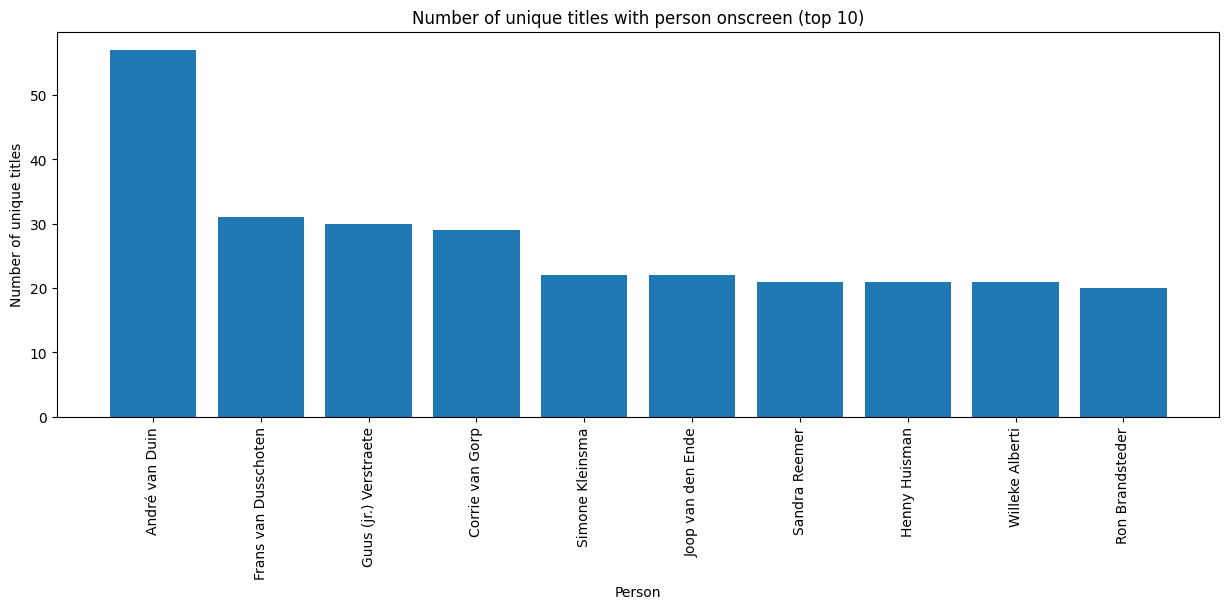

In [159]:

plot_Y_against_X_as_bar_chart(list(person_counts.index)[:number_to_show],
                            list(person_counts)[:number_to_show], 
                            f"Number of unique titles with person onscreen (top {number_to_show})",
                            "Person",
                            "Number of unique titles", 
                            True)

### Specific person

In [145]:
person = "Frans van Dusschoten"

programmes_dataframe['index'] = programmes_dataframe.index
mask = programmes_dataframe['Persons behind camera'].apply(lambda x: person in x)
programmes_with_person_behind_camera = programmes_dataframe[mask]

mask = programmes_dataframe['Persons in front of camera'].apply(lambda x: person in x)
programmes_with_person_in_front_of_camera = programmes_dataframe[mask]

all_programmes_with_person = pd.merge(programmes_with_person_behind_camera, programmes_with_person_in_front_of_camera, how="outer", on="index")

print(f"There are {len(all_programmes_with_person)} programmes with {person} in total\n")

set_titles_behind = set(list(programmes_with_person_behind_camera["Titel"]))
print(f"There are {len(programmes_with_person_behind_camera)} programmes with {person} behind the scenes, from {len(set_titles_behind)} series:\n")

print('\n'.join(set_titles_behind))

set_titles_front = set(list(programmes_with_person_in_front_of_camera["Titel"]))
print(f"\nThere are {len(programmes_with_person_in_front_of_camera)} programmes with {person} onscreen, from {len(set_titles_front)} series:\n")

print('\n'.join(set_titles_front))

There are 79 programmes with Frans van Dusschoten in total

There are 5 programmes with Frans van Dusschoten behind the scenes, from 2 series:

André van Duin's Pretmachine
André van Duins Teletheatershow

There are 79 programmes with Frans van Dusschoten onscreen, from 31 series:

1-2-3-Show
André van Duin Show
Liedjes uit de Ep Oorklep show
Corrie en haar mannen
André van Duins Teletheatershow
Lach om het leven (Andre van Duin revue)
Flip Fluitketelshow
Gala van de eeuw (100 jaar Carré)
André's Kerstshow
And're Andre
TWINTIG JAAR ANDRÉ: Andre's Jubileum Revue
Gala voor André
De Ep Oorklep show
André's comedy parade
Andre van Duin solo
Voor het doek op gaat
100 jaar Carré
Ik ben Joep Meloen

Boem-Boem
Andre van Duin's Jubileumshow
Het beste van André
Allemaal Theater
Dag dag heerlijke lach
Dag '83 - Hallo '84
Andre van Duin Revue 1989
Showbizzquiz
De gouden buut
In de hoofdrol
André van Duin's Pretmachine
André van Duin's lachcarrousel
André van Duin's lachcarrousel

